# 欠拟合、过拟合和正则化学习目标：
- 掌握过拟合、欠拟合的概念
- 掌握过拟合、欠拟合的产生原因
- 知道什么是正则化、以及正则化的分类

---

![拟合问题图](../img/拟合问题图.png)

# 1、什么是过拟合？
> 一个假设 在训练数据上能够获得比其他假设更好的拟合， 但是在测试数据集上却不能很好地拟合数据 (体现在准确率下降)，此时认为这个假设出现了过拟合的现象。(模型过于复杂)

# 2、什么是欠拟合？
> 一个假设 在训练数据上不能获得更好的拟合，并且在测试数据集上也不能很好地拟合数据 ，此时认为这个假设出现了欠拟合的现象。(模型过于简单)



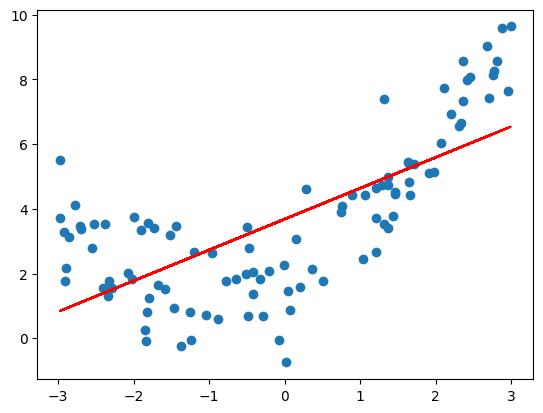

In [10]:
# 导入numpy包
import numpy as np
# 导入绘图pyplot包
import matplotlib.pyplot as plt
# 导入sklean的线性回归函数
from sklearn.linear_model import LinearRegression


# 随机数生成器种子的函数
np.random.seed(666)
# 生成-3～3范围内100个随机数
x = np.random.uniform(low=-3, high=3, size=100)
# 对x数组形状变换,
X = x.reshape(-1, 1)

# 生成高斯分布随机函数
y = (x**2)/2 + x + 2 + np.random.normal(loc=0, scale=1, size=100)

# 线性回归模型并训练数据
estimator = LinearRegression()
estimator.fit(X, y)
y_predict = estimator.predict(X)

# 绘制一个x、y的散点图
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [12]:
# 导入sklearn计算均方误差模块
from sklearn.metrics import mean_squared_error

# 计算均方误差
mean_squared_error(y, y_predict)

3.0750025765636577

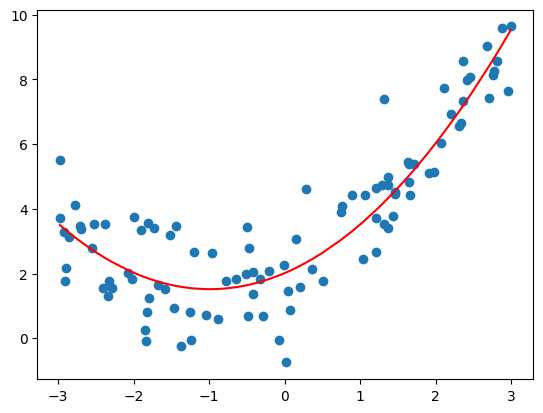

In [22]:
# 添加二次项，绘制图像
X2 = np.hstack([X, X**2])
estimator2 = LinearRegression()
estimator2.fit(X2, y)
y_predict2 = estimator2.predict(X2)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()


In [19]:
# 计算均方误差和准确率
from sklearn.metrics import mean_squared_error
mean_squared_error(y ,y_predict2)

1.0987392142417856

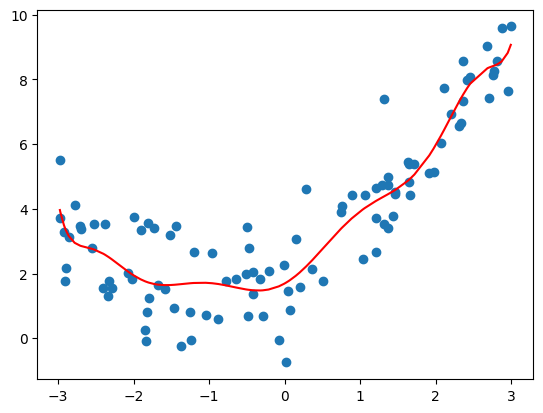

In [23]:
# 再次加入高次项，绘制图像，观察均方误差结果
X5 = np.hstack([X2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10])
estimator3 = LinearRegression()
estimator3.fit(X5, y)
y_predict5 = estimator3.predict(X5)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict5[np.argsort(x)], color='r')
plt.show()

In [26]:
# 计算均方误差和准确率
from sklearn.metrics import mean_squared_error

# 计算添加高次项的准确率
error = mean_squared_error(y, y_predict5)
error

1.0508466763764144

In [35]:
# X的测试集均方误差

# 导入训练集和测试集划分包
from sklearn.model_selection import train_test_split
# 导入均方误差计算包
from sklearn.metrics import mean_squared_error

# X测试集的均方误差
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

mean_squared_error(y_test, y_predict)

3.153139806483088

In [37]:
# X2的测试集均方误差

# 导入训练集和测试集划分包
from sklearn.model_selection import train_test_split
# 导入线性回归
from sklearn.linear_model import LinearRegression
# 导入均方误差计算包
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=5)
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)
mean_squared_error(y_test, y_predict)


1.1118738857319668

In [38]:
# X5的测试集的均方误差
X_train,X_test,y_train,y_test = train_test_split(X5,y,random_state = 5)
estimator = LinearRegression()
estimator.fit(X_train,y_train)
y_predict = estimator.predict(X_test)
mean_squared_error(y_test,y_predict)

1.414558054229706


# 3、欠拟合产生原因，以及解决办法?
- 原因：学习到数据的特征过少
- 解决办法：
    - 添加其他特征项；
    - 添加多项式特征；

# 4、过拟合产生原因，以及解决办法?
- 原因：原始特征过多，存在一些嘈杂特征， 模型过于复杂是因为模型尝试去兼顾所有测试样本
- 解决办法：
    - 减少特征维度
    - 重新清洗数据；
    - 增大数据的训练量；
    - 正则化；

# 5、什么是正则化？
- 概念：在学习的时候，数据提供的特征有些影响模型复杂度或者这个特征的数据点异常较多，所以算法在学习的时候尽量减少这个特征的影响（甚至删除某个特征的影响），这就是正则化
- 正则化类别：
    - L1正则化：假设L(W)是未加正则项的损失，𝜆是一个超参，控制正则化项的大小
    - L2正则化：假设L(W)是未加正则项的损失，𝜆是一个超参，控制正则化项的大小

[ 1.32292089e+00  2.03952017e+00 -2.88731664e-01 -1.24760429e+00
  8.06147066e-02  3.72878513e-01 -7.75395040e-03 -4.64121137e-02
  1.84873446e-04  2.03845917e-03]


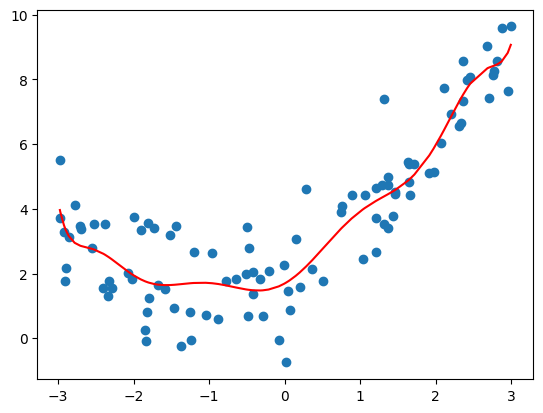

In [44]:
# 正则化案例
X10 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])
estimator3 = LinearRegression()
estimator3.fit(X10,y)
y_predict3 = estimator3.predict(X10)

print(estimator3.coef_)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict3[np.argsort(x)],color = 'r')
plt.show()



/root/anaconda3/envs/AI/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.116e+01, tolerance: 6.094e-02
  model = cd_fast.enet_coordinate_descent(


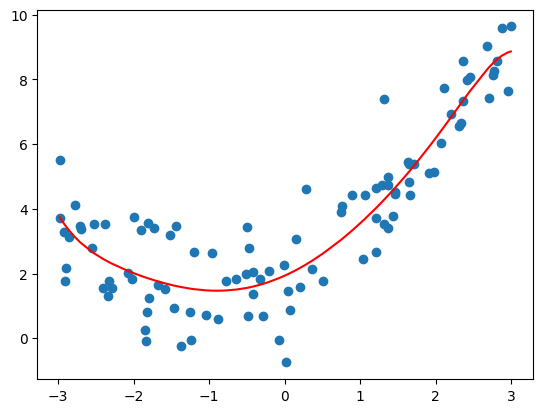

array([ 1.05737994e+00,  5.97953900e-01, -2.24343406e-02, -1.88302128e-02,
        5.65779744e-03,  1.40970165e-03,  1.59540397e-04, -3.46687066e-05,
       -8.98181777e-05, -4.15662577e-06])

In [50]:
from sklearn.linear_model import Lasso  # L1正则
from sklearn.linear_model import Ridge  # 岭回归 L2正则

X10 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])
# 调整alpha 正则化强度 查看正则化效果
# estimator_l1 = Lasso(alpha=0.005,normalize=True) 
estimator_l1 = Lasso(alpha=0.005) 
estimator_l1.fit(X10,y)
y_predict_l1 = estimator_l1.predict(X10)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict_l1[np.argsort(x)],color = 'r')
plt.show()

estimator_l1.coef_  # Lasso 回归  L1正则 会将高次方项系数变为0

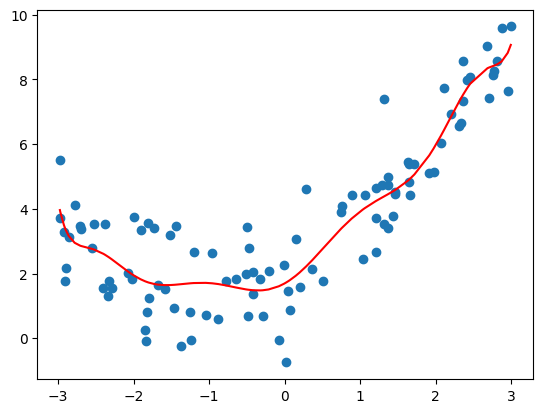

array([ 1.31994790e+00,  2.02668507e+00, -2.85259124e-01, -1.23711342e+00,
        7.94361403e-02,  3.69794297e-01, -7.59912682e-03, -4.60348428e-02,
        1.77902714e-04,  2.02210290e-03])

In [52]:
X10 = np.hstack([X2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10])
# estimator_l2 = Ridge(alpha=0.005,normalize=True) # 调整alpha 正则化强度 查看正则化效果
estimator_l2 = Ridge(alpha=0.005) # 调整alpha 正则化强度 查看正则化效果
estimator_l2.fit(X10,y)
y_predict_l2 = estimator_l2.predict(X10)

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict_l2[np.argsort(x)],color = 'r')
plt.show()

estimator_l2.coef_   # l2 正则不会将系数变为0 但是对高次方项系数影响较大

# 小结
- 欠拟合
    - 概念：在训练集上表现不好，在测试集上表现不好
    - 解决方法：继续学习：添加其他特征项，添加多项式特征
- 过拟合
    - 概念：在训练集上表现好，在测试集上表现不好
    - 解决方法：重新清洗数据集、增大数据的训练量、正则化、 减少特征维度
- 正则化
    - 在损失函数中加入正则项，通过减小回归系数
    - L1正则化：可以将某些特征的回归系数变为0
    - L1正则化API：Lasso回归
  ```python from sklearn.linear_model import Lasso ```

    - L2正则化：每次梯度下降迭代都减小特征前面的系数
    - L2正则化API：岭回归
    ``` python from sklearn.linear_model import Ridge ```


